In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,log_loss
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
y_true=np.array([1,0,1,0,1,0,1,0])
y_pred_proba=np.array([0.9,0.2,0.8,0.4,0.7,0.1,0.6,0.3])
y_pred_class=(y_pred_proba>=0.5).astype(int)
#tell the which is true +ve and true -ve
tp=np.sum((y_true==1) & (y_pred_class==1))
tn=np.sum((y_true==0) & (y_pred_class==0))
fp=np.sum((y_true==0) & (y_pred_class==1))
fn=np.sum((y_true==1) & (y_pred_class==0))
print(f"tp: {tp}")
print(f"tn: {tn}")
print(f"fp: {fp}")
print(f"fn: {fn}")

tp: 4
tn: 4
fp: 0
fn: 0


In [ ]:
acc=accuracy_score(y_true,y_pred_class)
print(f"accuracy: {acc: .3f}")
print("*"*17)
precison=precision_score(y_true,y_pred_class)
print(f"precision: {precison: .3f}")
print("*"*17)
recall=recall_score(y_true,y_pred_class)
print(f"recall: {recall: .3f}")
print("*"*17)
f1=f1_score(y_true,y_pred_class)
print(f"f1 score: {f1: .3f}")
print("*"*17)
logloss=log_loss(y_true,y_pred_proba)
print(f"log loss: {logloss: .3f}")
print("*"*17)


accuracy:  1.000
*****************
precision:  1.000
*****************
recall:  1.000
*****************
f1 score:  1.000
*****************
log loss:  0.299
*****************


In [ ]:
auc=roc_auc_score(y_true,y_pred_proba)
print(f"auc: {auc: .3f}")


auc:  1.000


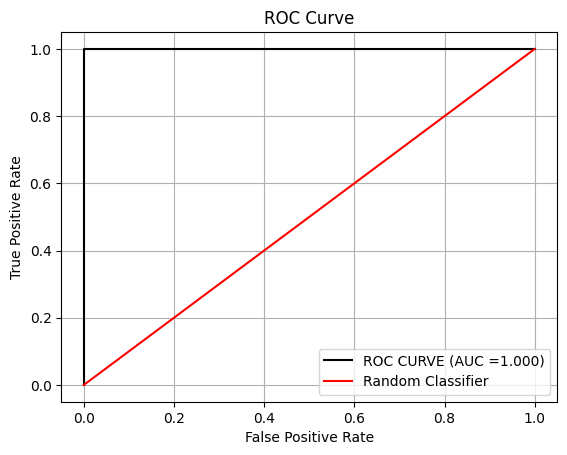

In [ ]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
fpr,tpr,thresholds=roc_curve(y_true,y_pred_proba)
plt.plot(fpr,tpr,color='black',label=f'ROC CURVE (AUC ={auc:.3f})')
plt.grid(True)
plt.plot([0,1],[0,1],linestyle="-",color="red",label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.legend()
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
import speech_recognition as sr
import pyttsx3
import datetime

# Initialize the voice
engine = pyttsx3.init()

def speak(text):
    engine.say(text)
    engine.runAndWait()

def take_command():
    r = sr.Recognizer()
    with sr.Microphone() as source:
        print("Listening...")
        audio = r.listen(source)
    try:
        query = r.recognize_google(audio, language='en-in')
        print(f"User said: {query}\n")
    except Exception:
        return "None"
    return query.lower()

# Main Logic
if __name__ == "__main__":
    speak("Jarvis is online. How can I help you?")
    while True:
        query = take_command()

        if 'time' in query:
            time = datetime.datetime.now().strftime("%I:%M %p")
            speak(f"The time is {time}")

        elif 'open' in query:
            # You can add logic to open your projects here
            speak("Opening your work, sir.")

        elif 'shutdown' in query:
            speak("Goodbye, sir.")
            break


ModuleNotFoundError: No module named 'speech_recognition'

Original X shape: (100, 2)
Original y shape: (100,)
Class distribution: [53 47]

X_train shape: (70, 2)
X_test shape: (30, 2)
y_train shape: (70,)
y_test shape: (30,)

KNN classifier trained with k=5

Accuracy of KNN classifier: 0.800



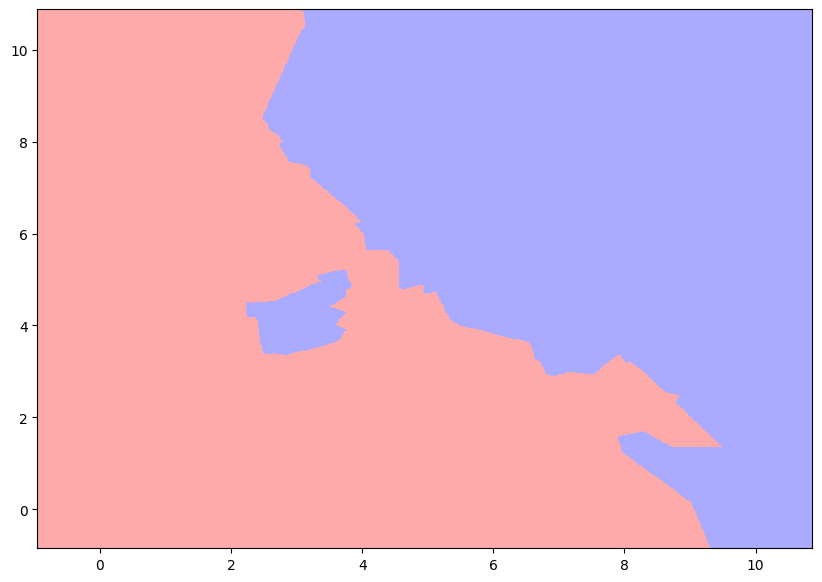

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


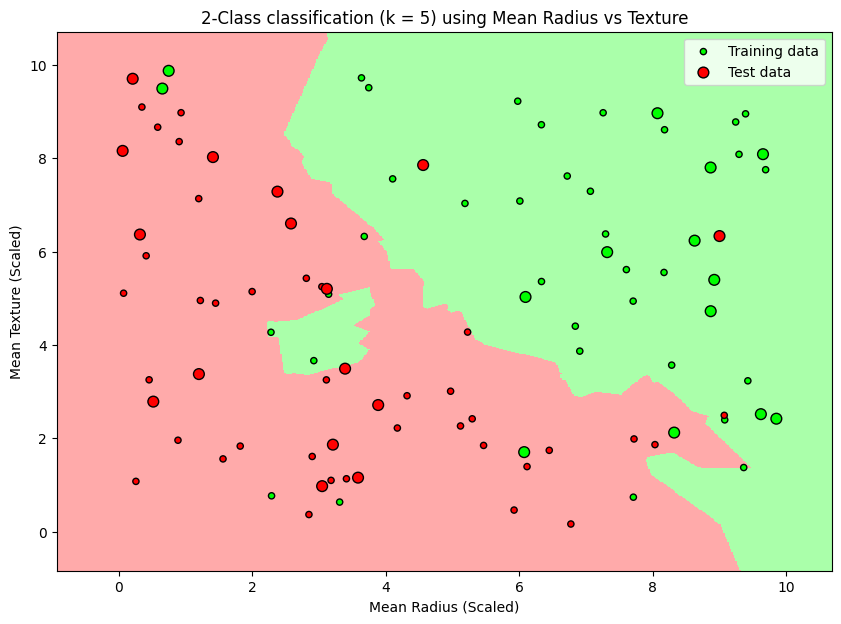

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features, values between 0-10
y = (X[:, 0] + X[:, 1] > 10).astype(int) # Binary classification based on sum of features

# Add some noise to make it less linearly separable
y_noisy_indices = np.random.choice(len(y), size=10, replace=False)
y[y_noisy_indices] = 1 - y[y_noisy_indices]

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}\n")

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}\n")

# 3. Choose a K value and initialize the KNN classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# 4. Train the model
knn_classifier.fit(X_train, y_train)
print(f"KNN classifier trained with k={k}\n")

# 5. Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# 6. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy:.3f}\n")

# 7. Visualization of decision boundary (optional)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. We can only plot 2 features in a 2D scatter plot
# Let's use 'mean radius' and 'mean texture' (Indices 0 and 1)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# 2. Parameters
k = 5  # You can change this to your 'best_k'
h = .02 # Step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA']) # Background colors
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])  # Point colors

# 3. Fit the model using only the two features
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train_2d, y_train)

# 4. Create a mesh grid to plot the decision boundaries
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict across the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. Plotting
plt.figure(figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20, label='Training data')

# Plot test points
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=60, marker='o', label='Test data')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"2-Class classification (k = {k}) using Mean Radius vs Texture")
plt.xlabel("Mean Radius (Scaled)")
plt.ylabel("Mean Texture (Scaled)")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Generate synthetic dataset
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84

Confusion Matrix:
 [[22  5]
 [ 3 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.80      0.87      0.83        23

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50



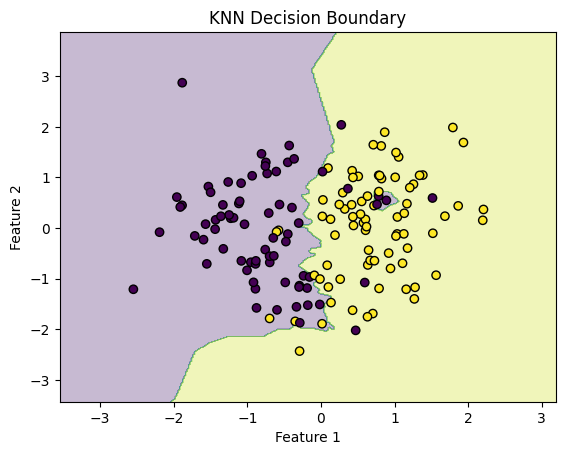

In [ ]:
 def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("KNN Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X_train, y_train, knn)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Sample regression data
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([10, 12, 15, 18, 20])

# Train model
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X, y)

# Prediction
print("Predicted value:", knn_reg.predict([[6]]))


Predicted value: [17.66666667]


Dataset Shape: (150, 4)

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Feature Importance:
              Feature  Importance
3   petal width (cm)    0.437185
2  petal length (cm)    0.431466
0  sepal length (cm)    0.116349
1   sepal width (cm)    0.015000


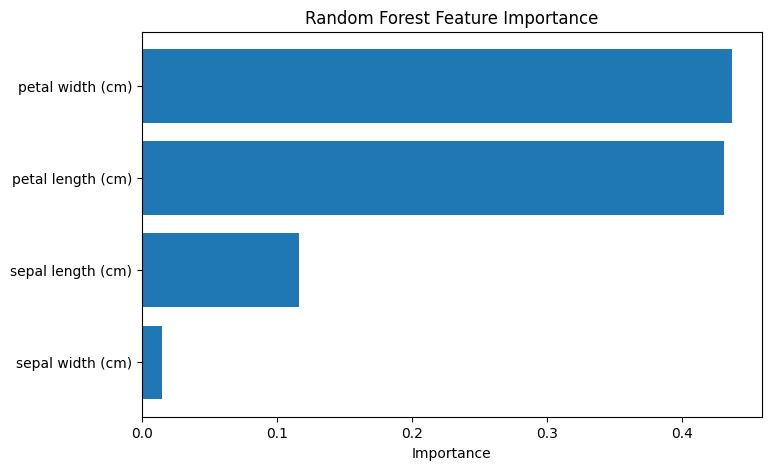


Model saved as random_forest_model.pkl

Predicted Class: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#09/01/2026
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# 2. LOAD DATASET
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)


# 3. DATA PREPROCESSING
# Check missing values
print("\nMissing values:\n", X.isnull().sum())

# Encode target if categorical
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)


# 4. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 5. HYPERPARAMETER TUNING
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)


# 6. TRAIN FINAL MODEL
best_model.fit(X_train, y_train)


# 7. PREDICTIONS
y_pred = best_model.predict(X_test)


# 8. MODEL EVALUATION
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# 9. FEATURE IMPORTANCE
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", importance)


# 10. FEATURE IMPORTANCE PLOT
plt.figure(figsize=(8, 5))
plt.barh(importance["Feature"], importance["Importance"])
plt.xlabel("Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


# 11. SAVE MODEL
joblib.dump(best_model, "random_forest_model.pkl")
print("\nModel saved as random_forest_model.pkl")


# 12. LOAD MODEL
loaded_model = joblib.load("random_forest_model.pkl")


# 13. NEW DATA PREDICTION
new_sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = loaded_model.predict(new_sample)

print("\nPredicted Class:", data.target_names[prediction][0])


Best Params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9333333333333333
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


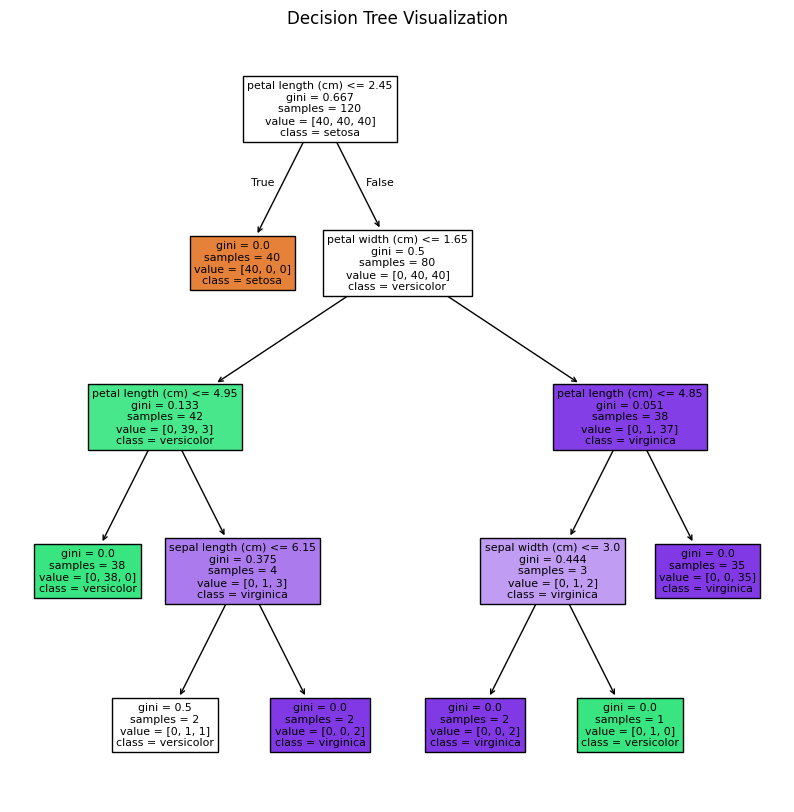


Feature Importance:
             Feature  Importance
2  petal length (cm)    0.565639
3   petal width (cm)    0.411154
1   sepal width (cm)    0.016878
0  sepal length (cm)    0.006329

Predicted Class: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1. Load & Preprocess
data = load_iris()
X, y = pd.DataFrame(data.data, columns=data.feature_names), pd.Series(data.target)
if y.dtype == "object": y = LabelEncoder().fit_transform(y)

# 2. Split & Tune
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
param_grid = {"criterion": ["gini", "entropy"], "max_depth": [2, 3, 4, 5, None],
              "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy").fit(X_train, y_train)
best_model = grid.best_estimator_

# 3. Evaluate
y_pred = best_model.predict(X_test)
print(f"Best Params: {grid.best_params_}\nAccuracy: {accuracy_score(y_test, y_pred)}")
print(f"Report:\n{classification_report(y_test, y_pred)}\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

# 4. Visualize Tree
plt.figure(figsize=(10, 10))
plot_tree(best_model, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization"); plt.show()

# 5. Feature Importance
imp = pd.DataFrame({"Feature": X.columns, "Importance": best_model.feature_importances_}).sort_values(by="Importance", ascending=False)
print(f"\nFeature Importance:\n{imp}")

# 6. Save, Load & Predict
joblib.dump(best_model, "decision_tree_model.pkl")
loaded_model = joblib.load("decision_tree_model.pkl")
print(f"\nPredicted Class: {data.target_names[loaded_model.predict([[5.1, 3.5, 1.4, 0.2]])][0]}")

Date:03/02/2026

In [ ]:
!pip install transformers spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#load the data
import pandas as pd
df = pd.read_csv('/content/cleaned_reviews.csv')
print(df.columns)

Index(['sentiments', 'cleaned_review', 'cleaned_review_length',
       'review_score'],
      dtype='object')


In [ ]:
#Sentiment analysis
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
# 1. Setup
nltk.download('vader_lexicon') # Run this once in your notebook
sia = SentimentIntensityAnalyzer()
df = pd.read_csv('cleaned_reviews.csv')
df['cleaned_review'] = df['cleaned_review'].fillna("")
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"
df_sentiment = df.head(100)
df_sentiment['ai_sentiment'] = df_sentiment['cleaned_review'].apply(get_vader_sentiment)
print(df_sentiment[['cleaned_review', 'ai_sentiment']].head())

                                      cleaned_review ai_sentiment
0  i wish would have gotten one earlier love it a...     Positive
1  i ve learned this lesson again open the packag...     Positive
2          it is so slow and lags find better option      Neutral
3  roller ball stopped working within months of m...     Negative
4  i like the color and size but it few days out ...     Positive


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipython-input-578759825.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['ai_sentiment'] = df_sentiment['cleaned_review'].apply(get_vader_sentiment)


In [ ]:
#NER
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
df = pd.read_csv('cleaned_reviews.csv')
df['cleaned_review'] = df['cleaned_review'].fillna("")
# 2. Intermediate NER Function
def get_spacy_entities(text):
    if not text: return "No entities"
    doc = nlp(text)
    interesting_labels = {'ORG', 'PERSON', 'GPE', 'DATE', 'PRODUCT'}
    entities = [f"{ent.text} ({ent.label_})" for ent in doc.ents if ent.label_ in interesting_labels]
    return ", ".join(list(set(entities))) if entities else "None found"
df_ner = df.head(50).copy()
print("Starting NER extraction...")
df_ner['entities'] = df_ner['cleaned_review'].apply(get_spacy_entities)

print("\n--- NER RESULTS ---")
print(df_ner[['cleaned_review', 'entities']].head(10))

Starting NER extraction...

--- NER RESULTS ---
                                      cleaned_review  \
0  i wish would have gotten one earlier love it a...   
1  i ve learned this lesson again open the packag...   
2          it is so slow and lags find better option   
3  roller ball stopped working within months of m...   
4  i like the color and size but it few days out ...   
5  overall love this mouse the size weight clicki...   
6                                 it stopped working   
7  my son uses school issued chromebook for schoo...   
8  loved this cute little mouse but it broke afte...   
9  should ve spent the money to get quality produ...   

                                            entities  
0                                         None found  
1  couple of weeks (DATE), august (DATE), mid sep...  
2                                         None found  
3                                      months (DATE)  
4                                         None found  
5    

In [ ]:
#SUMMARIZATION
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
model_name = "sshleifer/distilbart-cnn-12-6"
print("Loading model... this might take a moment.")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
def get_ai_summary(text):
    if pd.isna(text) or len(str(text).split()) < 20:
        return "Review too short to summarize."
    try:
        inputs = tokenizer([text], max_length=1024, return_tensors="pt", truncation=True)
        # Generate the summary
        summary_ids = model.generate(
            inputs["input_ids"],
            num_beams=4,
            max_length=40,
            min_length=10,
            early_stopping=True
        )
        return tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        return f"Error: {str(e)}"

Loading model... this might take a moment.


Loading weights:   0%|          | 0/358 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


In [ ]:
df = pd.read_csv('cleaned_reviews.csv')
sample_df = df.head(10).copy()
print("Summarizing reviews...")
sample_df['ai_summary'] = sample_df['cleaned_review'].apply(get_ai_summary)
print("\n--- SUMMARIZATION RESULTS ---")
print(sample_df[['cleaned_review', 'ai_summary']].head())

Summarizing reviews...

--- SUMMARIZATION RESULTS ---
                                      cleaned_review  \
0  i wish would have gotten one earlier love it a...   
1  i ve learned this lesson again open the packag...   
2          it is so slow and lags find better option   
3  roller ball stopped working within months of m...   
4  i like the color and size but it few days out ...   

                                          ai_summary  
0                     Review too short to summarize.  
1   The optical light will flash once when turned...  
2                     Review too short to summarize.  
3                     Review too short to summarize.  
4  i like the color and size but it few days out ...  
